# Exercise 1: K-Means Clustering on the Iris Dataset

## Problem:
The Iris dataset contains measurements of different iris flowers (sepal length, sepal width, petal length, and petal width) for three species of iris (setosa, versicolor, virginica). Your task is to implement K-Means clustering to group the data into three clusters and compare the resulting clusters with the actual species labels.

### Hint:

Load the Iris dataset from Scikit-learn.
Use the KMeans class to perform clustering.
Visualize the clusters using a scatter plot of the first two principal components.

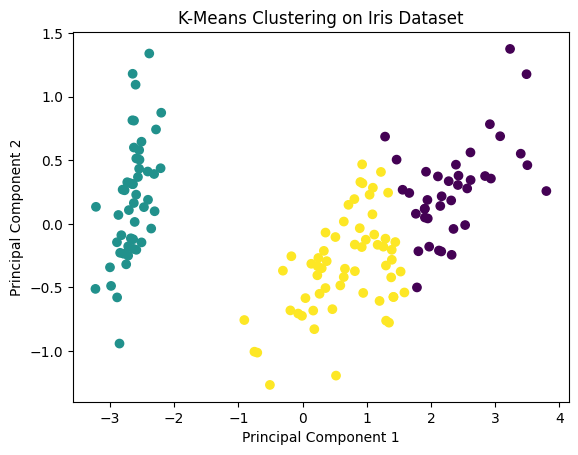

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', label='Clusters')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Exercise 2: Ensemble Learning with the Titanic Dataset

## Problem:
Using the Titanic dataset, build a model to predict survival. Implement a Bagging classifier using Decision Trees as the base estimator and evaluate the model's performance.

## Hint:

Load the Titanic dataset using Pandas.
Preprocess the data (e.g., handle missing values, encode categorical variables).
Use BaggingClassifier with DecisionTreeClassifier as the base estimator.
Evaluate using cross-validation.

In [4]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocess the data
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement Bagging with Decision Tree
base_estimator = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
scores = cross_val_score(bagging, X_train, y_train, cv=5)

# Output the performance
print(f'Cross-Validation Accuracy: {scores.mean():.4f}')


C:\Users\LuisValencia\AppData\Local\Temp\ipykernel_56356\3964192309.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\LuisValencia\AppData\Local\Temp\ipykernel_56356\3964192309.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

Cross-Validation Accuracy: 0.7994


# Exercise 3: PCA on the Wine Quality Dataset

## Problem:
Apply Principal Component Analysis (PCA) to the Wine Quality dataset to reduce its dimensionality. Visualize the first two principal components and analyze how well they represent the original data.

## Hint:

Load the Wine Quality dataset from a URL.
Standardize the features before applying PCA.
Visualize the first two principal components with a scatter plot.

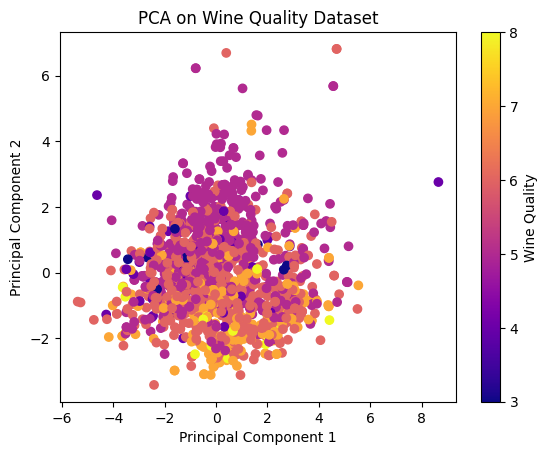

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_data.drop('quality', axis=1))

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=wine_data['quality'], cmap='plasma')
plt.title('PCA on Wine Quality Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Wine Quality')
plt.show()
